In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy
from decimal import *
import pandas as pd

In [2]:
import threading
import numpy as np
import datetime

In [3]:
import itertools

In [4]:
def calcImportance_pre(stake):

    # get total stake per node
    stakePerNode = [(sum(e)) for e in stake]

    totalStake = sum(stakePerNode)

    n = len(stake)
    weight = [0] * n
    importance = [0] * n
    for x in range(n):
        for y in range(n):
            # weight of a node is 0 if its stake is equal to 0
            #weight(channel) = sqrt(balance(channel) / stake(channel.source) * stake(channel.destination))
            weight[y] += 0 if stakePerNode[y]==0 else numpy.sqrt(stake[y][x]/stakePerNode[y] * stakePerNode[x])

    #print("Weighted downstream stake per node p(n) = ", weight)
    importanceList = numpy.array(weight) * numpy.array(stakePerNode)
    return importanceList;

def setupStake(
        # Number of nodes in the network. This number can be changed to test with small and large network size
        numNodes= 20,
        # the minimum number of channels a node can open
        minChannelsPerNode=2,
        # the maximum number of channels a node can open 
        maxChannelsPerNode=10,
        minFundsPerNode=10,
        maxFundsPerNode=100,
        tokensPerTicket=0.1
    ):

    stake = [[0 for i in range(numNodes)] for j in range(numNodes)]
    listStakePerChannel = []
    avg_stake_list = []
    index_list = []
    for x in range(numNodes-3):
        # each node is given a random funding amount
        myFunds = numpy.random.rand() * (maxFundsPerNode - minFundsPerNode) + minFundsPerNode

        # get random number of channels per node
        myChannels = int(numpy.random.rand() * (maxChannelsPerNode - minChannelsPerNode + 1) + minChannelsPerNode)

        # This value represents the amount each node stakes in their channel
        # It is computed as the number of funds a node has divided by number of channels they open
        stakePerChannel = myFunds / myChannels
        stakePerChannel = int(stakePerChannel / tokensPerTicket) * tokensPerTicket
        
        # Creats a list of stakePerChannel
        listStakePerChannel.append(stakePerChannel)

        # Identifying the maximum stake
        maxListStakePerChannel = max(listStakePerChannel)
        
        # Identifying the "position" of the stake - which node initiated 
        index = listStakePerChannel.index(maxListStakePerChannel)
        index_list.append(index)
        index_max = max(index_list)

        # fund channels by writing into stake matrix
        for c in range(myChannels):
            # TODO: this does not prevent a node from opening a channel to the same counterparty multiple times
            counterparty = int(numpy.random.rand() * (numNodes - 4))

            # cannot open channel to self - keep diagonal of matrix at 0
            if counterparty >= x:
                counterparty = counterparty + 1
            stake[x][counterparty] = stakePerChannel
        
        sum_stake = sum([sum(stake[li]) for li in range(numNodes-3)])
        avg_stake = sum_stake/(numNodes-3)
        
        #importance_score = calcImportance_pre(stake)
       
    #calculating imporance score
    #importance_max = max(importance_score)
    #index_of_importance = numpy.where(importance_score == importance_max)
    #importance_max = index_of_importance[0][0] 
        
    #non_random node 1, strategy: spreading the stakes equally between the channels
    for b in range(numNodes-3):
        stake[numNodes-3][b] = avg_stake/(numNodes-3)
        
    #non_random node 2, strategy: spreading the stakes between the channels based on their proportionate share of the sum of stakes
    for r in range(numNodes-3):
        stake[numNodes-2][r] = sum(stake[r])/sum_stake*avg_stake
    
    stake = [[Decimal(i) for i in j] for j in stake]
    
    return stake

In [5]:
initial_stake = setupStake()
initial_stake

[[Decimal('0'),
  Decimal('6.5'),
  Decimal('0'),
  Decimal('0'),
  Decimal('0'),
  Decimal('6.5'),
  Decimal('6.5'),
  Decimal('0'),
  Decimal('0'),
  Decimal('6.5'),
  Decimal('0'),
  Decimal('6.5'),
  Decimal('0'),
  Decimal('0'),
  Decimal('0'),
  Decimal('0'),
  Decimal('6.5'),
  Decimal('0'),
  Decimal('0'),
  Decimal('0')],
 [Decimal('10.300000000000000710542735760100185871124267578125'),
  Decimal('0'),
  Decimal('0'),
  Decimal('0'),
  Decimal('10.300000000000000710542735760100185871124267578125'),
  Decimal('0'),
  Decimal('10.300000000000000710542735760100185871124267578125'),
  Decimal('10.300000000000000710542735760100185871124267578125'),
  Decimal('10.300000000000000710542735760100185871124267578125'),
  Decimal('0'),
  Decimal('0'),
  Decimal('10.300000000000000710542735760100185871124267578125'),
  Decimal('0'),
  Decimal('0'),
  Decimal('0'),
  Decimal('10.300000000000000710542735760100185871124267578125'),
  Decimal('10.30000000000000071054273576010018587112426757812

In [6]:
def calcImportance(stake):

    # get total stake per node
    stakePerNode = [Decimal(sum(e)) for e in stake]

    totalStake = sum(stakePerNode)

    n = len(stake)
    weight = [0] * n
    importance = [0] * n
    for x in range(n):
        for y in range(n):
            # weight of a node is 0 if its stake is equal to 0
            #weight(channel) = sqrt(balance(channel) / stake(channel.source) * stake(channel.destination))
            weight[y] += 0 if stakePerNode[y]==0 else numpy.sqrt(stake[y][x]/stakePerNode[y] * stakePerNode[x])

    #print("Weighted downstream stake per node p(n) = ", weight)
    importanceList = numpy.array(weight) * numpy.array(stakePerNode)
    return importanceList;

In [7]:
initial_importance = calcImportance(initial_stake)
initial_importance

array([Decimal('664.5967504723624426761722825'),
       Decimal('1549.900438886052050784024307'),
       Decimal('310.2279049702547042687755835'),
       Decimal('1502.569798540990415851856408'),
       Decimal('756.3122509510019808727890722'),
       Decimal('520.9311651403459909483668643'),
       Decimal('903.6365649471022968060826743'),
       Decimal('792.9699367993290530074671292'),
       Decimal('617.1630110176283418695072594'),
       Decimal('608.2453976880268555927155931'),
       Decimal('1145.182282337286626264419255'),
       Decimal('825.0272335159226191585678983'),
       Decimal('338.7009594635113168229623886'),
       Decimal('609.0990944582110527781823022'),
       Decimal('748.5974678863402791611632648'),
       Decimal('736.8278475912333747164357397'),
       Decimal('359.7052871376043965097320281'),
       Decimal('1358.951309589433549579273818'),
       Decimal('1390.607853018036298202286381'), Decimal('0')],
      dtype=object)

In [8]:
def selectChannel(weights, weightIndexToNodeLUT):
    """
    Randomly selects a counterparty based on weights according to a LUT
    Returns the node id (or -1 if none could be found)
    Parameters
    ----------
    weights: a list of weights to be used for normalizing the random selection
    weightIndexToNodeLUT: a LUT translating the weights list to node ids
    """
    rand = numpy.random.rand()
    totalWeight = sum(weights)
    sumWeights = 0
    counterparty = -1
    for i in enumerate(weights):
        sumWeights += i[1]
        if totalWeight == 0:
           sumWeights = 0
        else:
            if sumWeights / totalWeight >= rand:
               counterparty = weightIndexToNodeLUT[i[0]]
               break;
    return counterparty

In [9]:
def randomPickWeightedByImportance(importance):
    channel = selectChannel(importance, [i for i in range(len(importance))])
    return channel

In [10]:
def selectChannel(weights, weightIndexToNodeLUT):
    """
    Randomly selects a counterparty based on weights according to a LUT
    Returns the node id (or -1 if none could be found)
    Parameters
    ----------
    weights: a list of weights to be used for normalizing the random selection
    weightIndexToNodeLUT: a LUT translating the weights list to node ids
    """
    rand = numpy.random.rand()
    totalWeight = sum(weights)
    sumWeights = 0
    counterparty = -1
    for i in enumerate(weights):
        sumWeights += i[1]
        if totalWeight == 0:
           sumWeights = 0
        else:
            if sumWeights / totalWeight >= rand:
               counterparty = weightIndexToNodeLUT[i[0]]
               break;
    return counterparty;

def randomPickWeightedByImportance(importance):
    channel = selectChannel(importance, [i for i in range(len(importance))])
    return channel;

def openChannels(stake, importance):
        #print("opening channels")
        numOpenChannels = 0
        channelcount = 1
        ctn = 19
        openchannelid = [ctn]
        tokensPerChannel = 10
        # add own id to avoid self-staking
        while (numOpenChannels < channelcount):

            # do not open channels to same counterparty multiple times
            tmpImportance = list(importance)
            for i in range(len(importance)):
                if i in openchannelid:
                    tmpImportance[i] = 0

            newChannel = randomPickWeightedByImportance(tmpImportance)
            
            if (newChannel == -1):
                print("ERROR: could not find a counterparty to open the channel to!")
                # TODO: here we should try again but this time including 0 importance nodes
            else:
                #print("opening channel to node ", newChannel)
                stake[ctn][newChannel] = stake[ctn][newChannel] + 10
                openchannelid.append(newChannel)
            # if opening channels didn't work we still want this loop to terminate
            numOpenChannels = numOpenChannels + 1
        
        return openchannelid

In [11]:
 def sendPacket(stake, importance):
        #print("sending packet")

        # persist importance list between attempts so that dead ends can be removed
        importanceAttempts = importance.copy()
        attemptsPerTick = 10
        hops = 3
        numPlayers = 4
        ctNodeId = 19

        for a in range(attemptsPerTick):
            nextNodeIndex = ctNodeId
            pathIndices = [nextNodeIndex]

            # try to find a path
            for j in range(hops):
                # reset importance
                importanceTmp = importanceAttempts.copy()
                #hoprsim.printArray1d(importanceTmp, 1)

                # remove importance entries for nodes to which current hop has no open channels
                # this is used in the path selection for the next hop
                for i in range(numPlayers):
                    if stake[nextNodeIndex][i] == 0 :
                        importanceTmp[i] = 0

                # prevent loops in path by removing existing nodes on path from list
                for i in pathIndices:
                    importanceTmp[i] = 0

                #hoprsim.printArray1d(importanceTmp, 1)
                nextNodeIndex = randomPickWeightedByImportance(importanceTmp)
                if nextNodeIndex == -1:
                    break # stop looking for path if no next node could be found
                pathIndices.append(nextNodeIndex)

            #print("Found path: ", pathIndices)
            return pathIndices
            # then facilitate they payout to each node
            # but only as long as the edge is valid (new earnings + existing earnings <= counter party stake)

In [12]:
def number_of_openings(stake, importance):    
    opening_count = []
    opening_list = []
    sending_count = []
    sending_list = []
    
    for _ in range(1000):
        #running the openChannel function 1000 times 
        #creating a list from the outputs
        opening_channel_to = openChannels(stake, importance)
        opening_count.append(opening_channel_to)
        for _ in range(10):
            sending_packet_to = sendPacket(stake, importance)
            sending_count.append(sending_packet_to)
    
    #orginizing the list in a dataframe - where each opening/sending position refers to a column 
    opening_pd = pd.DataFrame(opening_count)
    sending_pd = pd.DataFrame(sending_count)

    #summing up the opening appearance by node
    for h in range(len(opening_pd.columns)):
        #counting the value by opening positions (e.g. - how many times showep up the given node as the first node of openings)
        openings = opening_pd[h].value_counts()
        opening_list.append(openings)
    #organizing the list in a new dataframe
    opening_list = pd.concat(opening_list).to_frame().reset_index()
    opening_list.columns = ['node_opening_to', 'sum_opening']
      
      #summing up the sending appearance by node
    for k in range(len(sending_pd.columns)):
        #counting the value by opening positions (e.g. - how many times showep up the given node as the first node of openings)
        sendings = sending_pd[k].value_counts()
        sending_list.append(sendings)
    #organizing the list in a new dataframe
    sending_list = pd.concat(sending_list).to_frame().reset_index()
    sending_list.columns = ['node_sending_to', 'sum_sending']
    
    
    #summing up by nodes
    opening_list = opening_list.groupby(['node_opening_to']).sum()
    sending_list = sending_list.groupby(['node_sending_to']).sum()
    stake_ct = stake[19]
    
    output = pd.concat([opening_list, sending_list], axis=1)
    output['stake'] = stake_ct
    
    return output

In [13]:
result_of_the_game = number_of_openings(initial_stake, initial_importance)
result_of_the_game

,sum_opening,sum_sending,stake
0,44,942,440
1,113,1732,1130
2,15,420,150
3,96,1739,960
4,45,1687,450
5,35,1176,350
6,48,1811,480
7,51,1743,510
8,46,1403,460
9,36,1374,360


In [14]:
y = result_of_the_game['sum_sending'][:-1]

In [15]:
x = initial_importance[:-1]

<function matplotlib.pyplot.show(*args, **kw)>

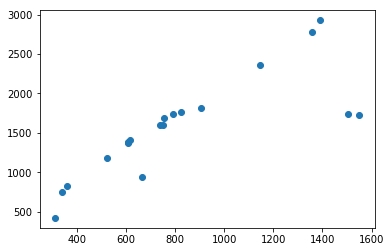

In [16]:
plt.scatter(x, y)
plt.show